## Mini Project 3
##### Contributors: Michael Persson & Sepehr Mansouri

 # EDA

In [71]:
# Load data
import pandas as pd

DATA_PATH = "../data/Mall_Customers.csv"
df = pd.read_csv(DATA_PATH)

# Normalize column names for easier access
df.columns = [c.strip().lower().replace(" ", "_").replace("(", "").replace(")", "") for c in df.columns]
df.head()

,customerid,gender,age,annual_income_k$,spending_score_1-100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [72]:
# Dataset overview
print(df.shape)
print("Information on  Dataset:")
df.info()

print("\n Statistics:")
df.describe()

(200, 5)
Information on  Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   gender                200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k$      200 non-null    int64 
 4   spending_score_1-100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Statistics:


,customerid,age,annual_income_k$,spending_score_1-100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [73]:
# Missing values and duplicates
print("\n Missing values and duplicates:")
print(df.isna().sum())
print(df.duplicated().sum())


 Missing values and duplicates:
customerid              0
gender                  0
age                     0
annual_income_k$        0
spending_score_1-100    0
dtype: int64
0


In [74]:
# Summary statistics
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income_k$,200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
spending_score_1-100,200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


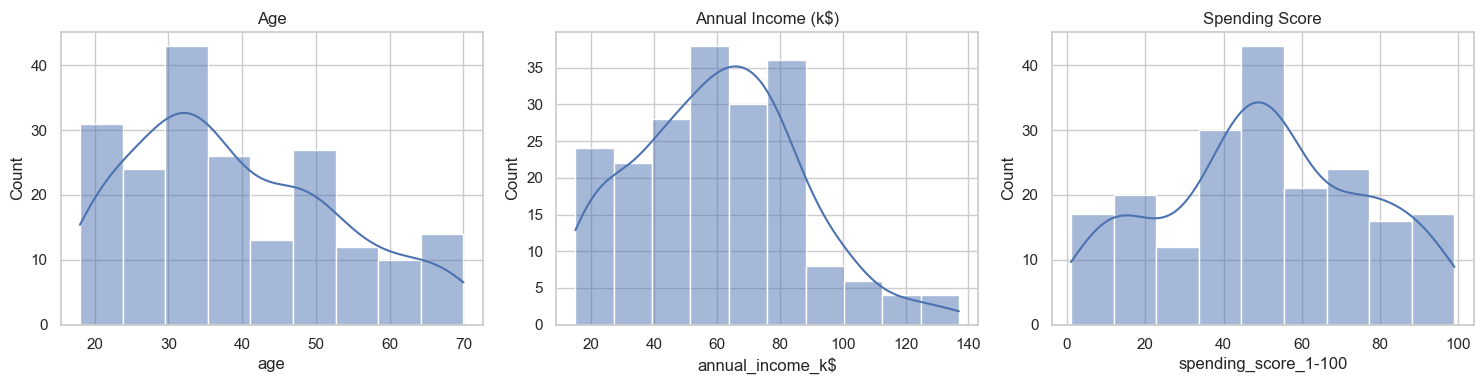

In [75]:
# Distributions
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df["age"], kde=True, ax=axes[0])
axes[0].set_title("Age")
sns.histplot(df["annual_income_k$"], kde=True, ax=axes[1])
axes[1].set_title("Annual Income (k$)")
sns.histplot(df["spending_score_1-100"], kde=True, ax=axes[2])
axes[2].set_title("Spending Score")
plt.tight_layout()

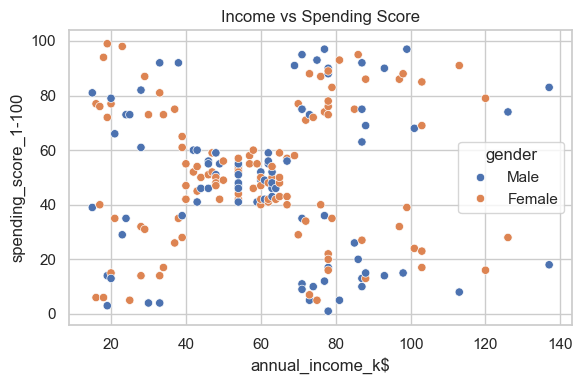

In [76]:
# Relationships
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="annual_income_k$", y="spending_score_1-100", hue="gender")
plt.title("Income vs Spending Score")
plt.tight_layout()

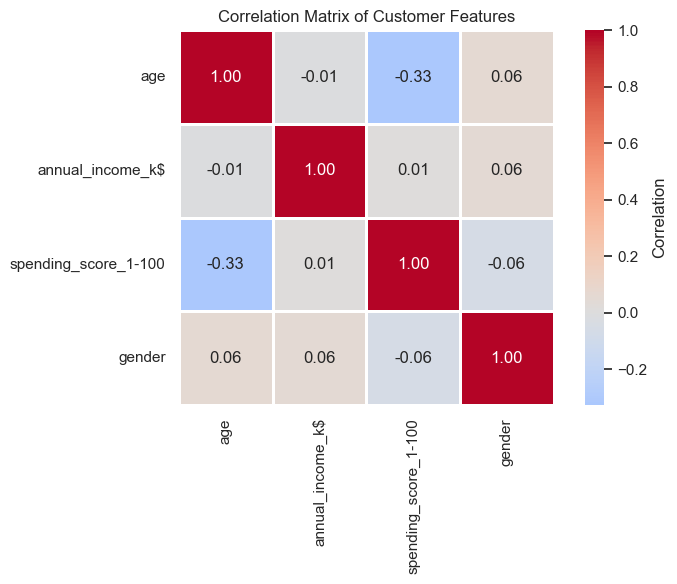

In [77]:
# Create a copy and convert gender to numeric
df_corr = df.copy()
df_corr['gender'] = (df_corr['gender'] == 'Male').astype(int)

# Plot correlation matrix
plt.figure(figsize=(8, 6))
correlation_matrix = df_corr[['age', 'annual_income_k$', 'spending_score_1-100', 'gender']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Customer Features')
plt.tight_layout()
plt.show()

# Part 1: Clustering Analysis
## K-means

   customerid  age  annual_income_k$  spending_score_1-100  gender_Male
0           1   19                15                    39         True
1           2   21                15                    81         True
2           3   20                16                     6        False
3           4   23                16                    77        False
4           5   31                17                    40        False


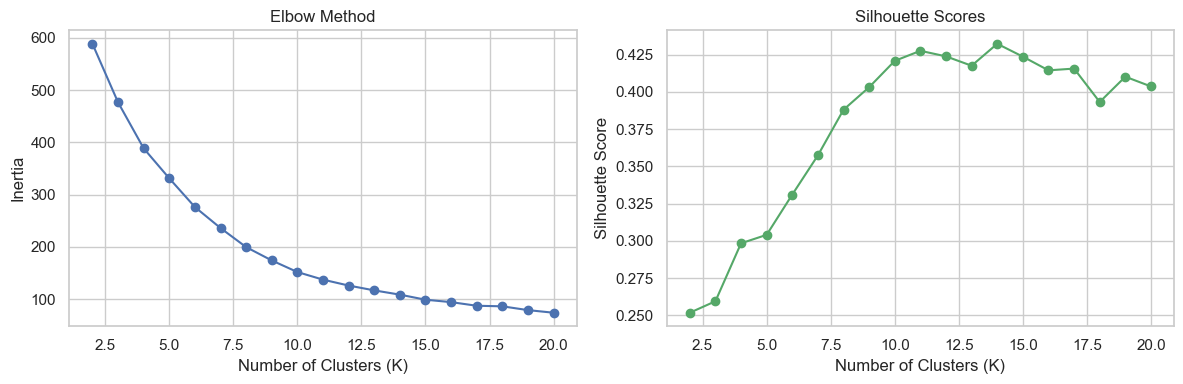

K=2: Inertia=588.80, Silhouette Score=0.2518
K=3: Inertia=476.79, Silhouette Score=0.2595
K=4: Inertia=388.72, Silhouette Score=0.2984
K=5: Inertia=331.31, Silhouette Score=0.3041
K=6: Inertia=276.41, Silhouette Score=0.3311
K=7: Inertia=236.20, Silhouette Score=0.3574
K=8: Inertia=199.75, Silhouette Score=0.3880
K=9: Inertia=174.24, Silhouette Score=0.4031
K=10: Inertia=152.03, Silhouette Score=0.4208
K=11: Inertia=137.50, Silhouette Score=0.4275
K=12: Inertia=126.20, Silhouette Score=0.4238
K=13: Inertia=116.95, Silhouette Score=0.4175
K=14: Inertia=108.79, Silhouette Score=0.4322
K=15: Inertia=99.10, Silhouette Score=0.4236
K=16: Inertia=94.48, Silhouette Score=0.4144
K=17: Inertia=87.54, Silhouette Score=0.4156
K=18: Inertia=86.44, Silhouette Score=0.3932
K=19: Inertia=79.19, Silhouette Score=0.4101
K=20: Inertia=74.19, Silhouette Score=0.4036


In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

# Prepare data for clustering

# one-hot encode gender
one_hot_encoded = pd.get_dummies(df, columns=["gender"], drop_first=True)
print(one_hot_encoded.head())


features = one_hot_encoded[["annual_income_k$", "spending_score_1-100", "gender_Male", "age"]]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Elbow method and silhouette scores
inertias = []
silhouette_scores = []
k_range = range(2, 21)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(k_range, inertias, 'bo-')
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True)

axes[1].plot(k_range, silhouette_scores, 'go-')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print scores
for k, inertia, sil_score in zip(k_range, inertias, silhouette_scores):
    print(f"K={k}: Inertia={inertia:.2f}, Silhouette Score={sil_score:.4f}")

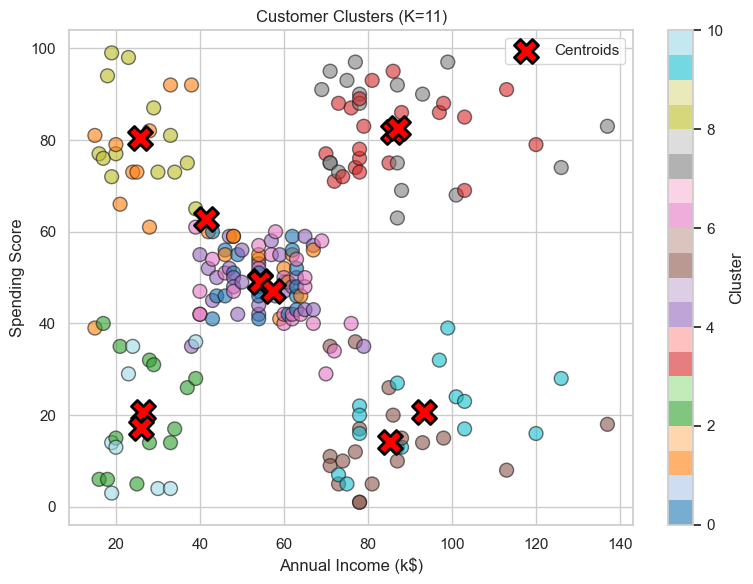

In [79]:
# Train KMeans
optimal_k = 11
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimal.fit(features_scaled)

# Copy data and add cluster labels to dataframe
df_copy = df.copy()
df_copy['cluster'] = kmeans_optimal.labels_

# Visualize clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_copy['annual_income_k$'], df_copy['spending_score_1-100'], 
                     c=df_copy['cluster'], cmap='tab20', s=100, alpha=0.6, edgecolors='k')
plt.scatter(scaler.inverse_transform(kmeans_optimal.cluster_centers_)[:, 0],
           scaler.inverse_transform(kmeans_optimal.cluster_centers_)[:, 1],
           c='red', marker='X', s=300, edgecolors='black', linewidth=2, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title(f'Customer Clusters (K={optimal_k})')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.tight_layout()
plt.show()

               age                    annual_income_k$                      \
              mean        std min max             mean        std min  max   
cluster                                                                      
0        58.350000   9.393587  40  70        54.300000   7.491047  43   63   
1        24.136364   5.946551  18  38        41.454545  17.371918  15   67   
2        41.538462  10.260079  20  58        26.538462   7.763326  16   39   
3        32.190476   3.076021  27  38        86.047619  14.157953  70  120   
4        54.153846   7.821469  43  68        54.230769   9.957139  38   79   
5        39.500000  12.550949  19  59        85.150000  16.030481  71  137   
6        27.960000   6.667583  18  40        57.360000  10.980589  39   76   
7        33.277778   4.389902  27  40        87.111111  18.929867  69  137   
8        25.461538   5.221995  20  35        25.692308   8.239990  16   39   
9        43.785714   7.244930  34  57        93.285714  16.62448

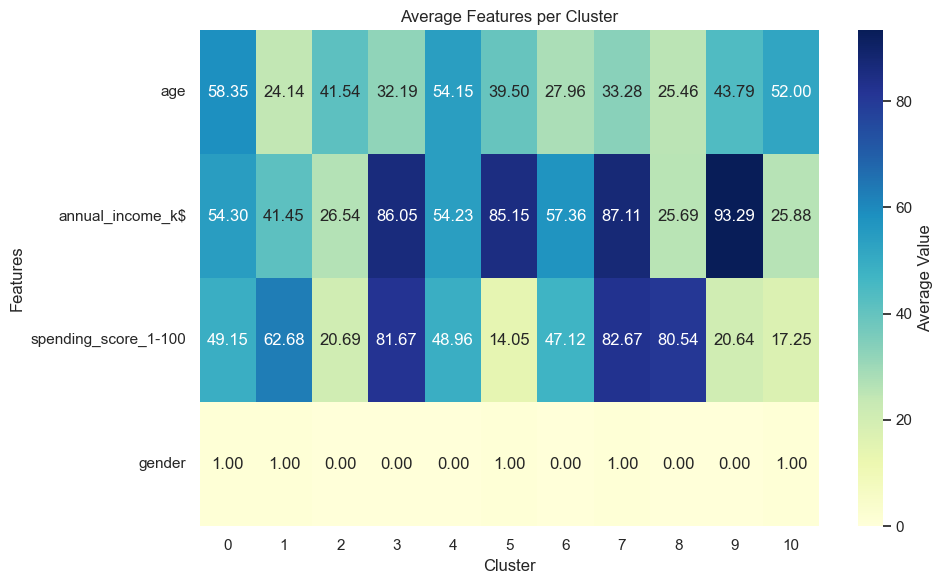

In [80]:
# Convert gender to numeric for aggregation
df_copy['gender'] = (df_copy['gender'] == 'Male').astype(int)

# Summarize features per cluster
cluster_summary = df_copy.groupby('cluster')[['age', 'annual_income_k$', 'spending_score_1-100', 'gender']].agg(['mean', 'std', 'min', 'max'])
print(cluster_summary)

# Count customers per cluster
cluster_counts = df_copy['cluster'].value_counts().sort_index()
print("\nCustomers per cluster:")
print(cluster_counts)
# Heatmap of cluster averages
cluster_means = df_copy.groupby('cluster')[['age', 'annual_income_k$', 'spending_score_1-100', 'gender']].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Average Value'})
plt.title('Average Features per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## Analysis

K = 11 was chosen as there is no clear elbow, and it is close to the maximum silhouette score. K = 4 and K = 14 were also candidates, 4 was considered as there is a reduction in the silhouette score gained from 4 to 5 and may be acceptable when looking for a coarser analysis of data. 14 was considered as it provides the maximum silhouette score up to K=20, however given the limited gain in score from 11 and the limited number of datapoints, 11 is a good balance to ensure clusters don't become too small (and therefore useless for analysis).

### Clusters
0: older men, medium income, medium spending\
1: younger men, below average income, above average spending\
2: middle age women, low income, low spending\
3: younger women, high income, high spending\
4: older women, medium income, medium spending\
5: middle age men, high income, low spending\
6: younger women, medium income, medium spending\
7: younger men, high income, high spending\
8: younger women, low income, high spending\
9: middle age women, high income, low spending\
10: older men, low income, low spending




# Part 2: Dimensionality Reduction

Explained variance ratio (PCA): [0.33690046 0.26230645]
Total explained variance (PCA): 0.5992069019819846


c:\Users\Sepeh\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


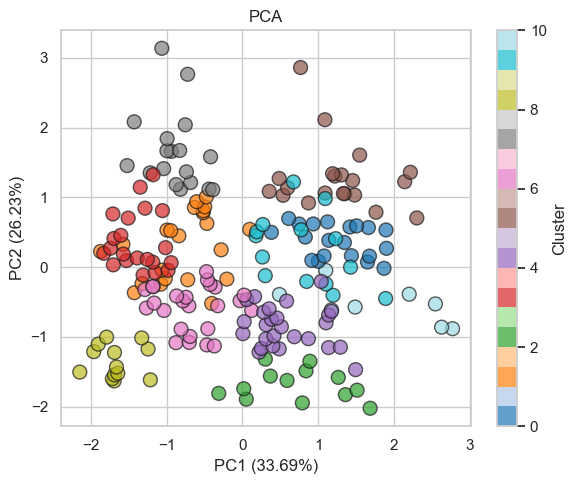

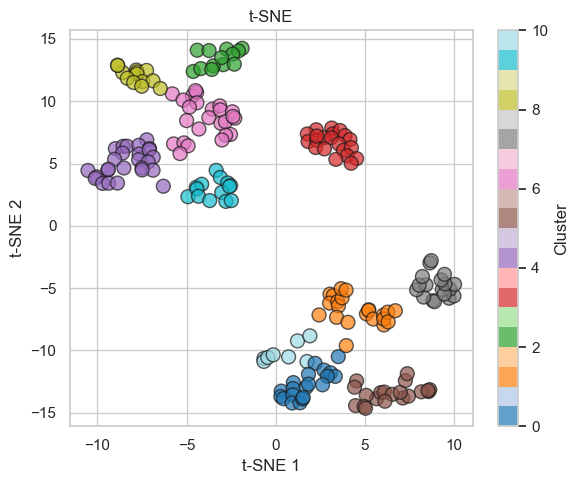

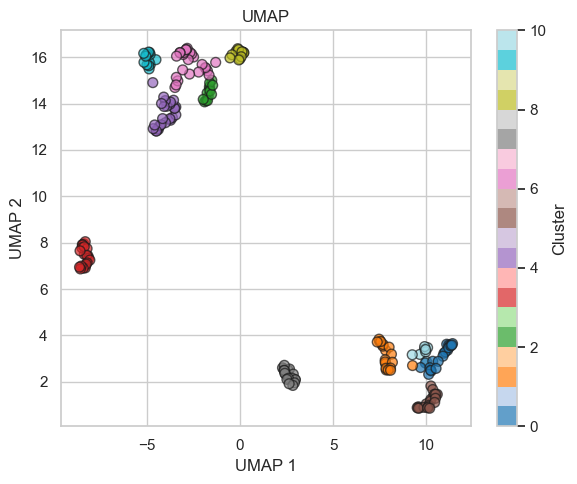

In [81]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Apply PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

print("Explained variance ratio (PCA):", pca.explained_variance_ratio_)
print("Total explained variance (PCA):", np.sum(pca.explained_variance_ratio_))

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_tsne = tsne.fit_transform(features_scaled)

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
features_umap = umap_reducer.fit_transform(features_scaled)

# Visualize each embedding separately

# PCA
plt.figure(figsize=(6, 5))
scatter1 = plt.scatter(features_pca[:, 0], features_pca[:, 1], 
                       c=df_copy['cluster'], cmap='tab20', s=100, alpha=0.7, edgecolors='k')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA')
plt.colorbar(scatter1, label='Cluster')
plt.tight_layout()
plt.show()

# t-SNE
plt.figure(figsize=(6, 5))
scatter2 = plt.scatter(features_tsne[:, 0], features_tsne[:, 1], 
                       c=df_copy['cluster'], cmap='tab20', s=100, alpha=0.7, edgecolors='k')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE')
plt.colorbar(scatter2, label='Cluster')
plt.tight_layout()
plt.show()

# UMAP
plt.figure(figsize=(6, 5))
scatter3 = plt.scatter(features_umap[:, 0], features_umap[:, 1], 
                       c=df_copy['cluster'], cmap='tab20', s=50, alpha=0.7, edgecolors='k')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP')
plt.colorbar(scatter3, label='Cluster')
plt.tight_layout()
plt.show()

## Analysis


#### **Comparison of Dimensionality Reduction Techniques**

From the finding we can deduct that:

PCA reveals the global structure of the dataset by projecting it onto the two directions of highest variance. In the PCA plot, clusters are partially separated but still do show overlap, particularly in the central regions. This suggests that while the clusters are distinguishable, their separation is not purely linear. PCA is useful for understanding overall variance distribution but is limited in revealing fine-grained cluster boundaries.

t-SNE produces a much clearer separation between clusters. In the t-SNE visualization, clusters appear compact and well-separated, making local neighborhood structure very clear. This indicates that customers within the same cluster are very similar to one another in the feature space. However, the relative distances between clusters are not meaningful in t-SNE, so it is best used for exploratory analysis rather than global interpretation.

UMAP also shows very strong cluster separation, similar to t-SNE, but with slightly better preservation of relationships. The UMAP plot shows distinct cluster groupings with less overlap than PCA, while still maintaining a sense of how clusters relate to one another spatially.

Overall, t-SNE and UMAP reveal more insight into the underlying cluster structure than PCA, with UMAP providing the best overall balance between local separation and the global structure.


#### **Linearity of the Data Structure**

The differences between the visualizations suggest that the data contains significant non-linear structure.

If the data were primarily linear, PCA would have produced well-separated clusters with minimal overlap. However, the PCA plot shows overlapping clusters, indicating that the linear projections alone are insufficient to fully separate the data.

On the other hand, both t-SNE and UMAP—which are non-linear dimensionality reduction techniques—produce much clearer and more compact cluster separation. This demonstrates that the relationships between income, spending behavior, and customer segments are non-linear in nature.

Finally, the data is best described as having a non-linear structure, which explains why non-linear techniques such as t-SNE and UMAP are more effective at revealing meaningful patterns in the dataset.


#### **Critical. Analysis:**

PCA helps illustrate the overall variance and global structure of the data, but it shows noticeable overlap between clusters, indicating that the relationships cannot be fully separated using linear projections alone.

t-SNE provides much clearer and more compact cluster separation, highlighting strong local similarities between customers. However, the distances between clusters are not meaningful, limiting its use for global interpretation.

UMAP offers a balance between PCA and t-SNE by showing clear cluster separation while still preserving some global structure. Overall, t-SNE and UMAP reveal more insight into the clustering than PCA, with UMAP providing the most balanced representation.

When comparing all three methods, t-SNE and UMAP provided more insight into the true clustering structure than PCA, with UMAP offering the most balanced view.

### Visualization for Business Presentation

For presenting results to business executives, PCA would be the preferred visualization. While t-SNE and UMAP show clearer cluster separation, PCA is easier to explain and more consistent, and its axes are directly related to the original features. It is known to produce the most stable & reproducible results.

Business stakeholders usually care more about overall trends than technical details. PCA provides a clear, high-level view of customer segments that is easy to understand without requiring deep technical explanation. For instance, we cannot explaing what t-SNE 1 = 5 actually means.

### Clustering

Cluster separation differs across visualization techniques. In the PCA plot, clusters show moderate overlap, suggesting that some customer segments share similar linear characteristics.

In contrast, t-SNE and UMAP show much clearer separation with minimal overlap, indicating that the data is better separated in a non-linear space. Overall, this suggests the data has non-linear structure and that the clustering is meaningful despite some overlap in PCA.

# Part 3: Anomaly Detection

Contamination: 0.05
  Anomalies detected: 10
  Normal points: 190

Contamination: 0.1
  Anomalies detected: 20
  Normal points: 180

Contamination: 0.15
  Anomalies detected: 30
  Normal points: 170



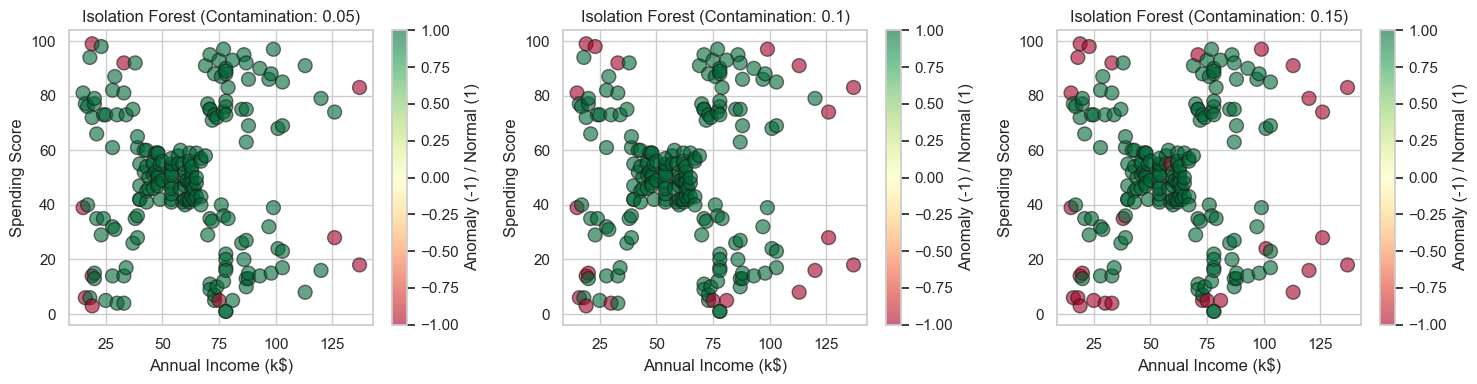

In [82]:
from sklearn.ensemble import IsolationForest

# Test with 3 different contamination values
contamination_values = [0.05, 0.1, 0.15]
anomaly_results = {}

for contamination in contamination_values:
    # Train Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    anomaly_labels = iso_forest.fit_predict(features_scaled)
    
    # -1 indicates anomalies, 1 indicates normal points
    n_anomalies = (anomaly_labels == -1).sum()
    
    anomaly_results[contamination] = {
        'model': iso_forest,
        'labels': anomaly_labels,
        'n_anomalies': n_anomalies
    }
    
    print(f"Contamination: {contamination}")
    print(f"  Anomalies detected: {n_anomalies}")
    print(f"  Normal points: {(anomaly_labels == 1).sum()}")
    print()

# Visualize anomalies for each contamination value
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, contamination in enumerate(contamination_values):
    anomaly_labels = anomaly_results[contamination]['labels']
    
    scatter = axes[idx].scatter(df_copy['annual_income_k$'], df_copy['spending_score_1-100'],
                                c=anomaly_labels, cmap='RdYlGn', s=100, alpha=0.6, edgecolors='k')
    axes[idx].set_xlabel('Annual Income (k$)')
    axes[idx].set_ylabel('Spending Score')
    axes[idx].set_title(f'Isolation Forest (Contamination: {contamination})')
    plt.colorbar(scatter, ax=axes[idx], label='Anomaly (-1) / Normal (1)')

plt.tight_layout()
plt.show()

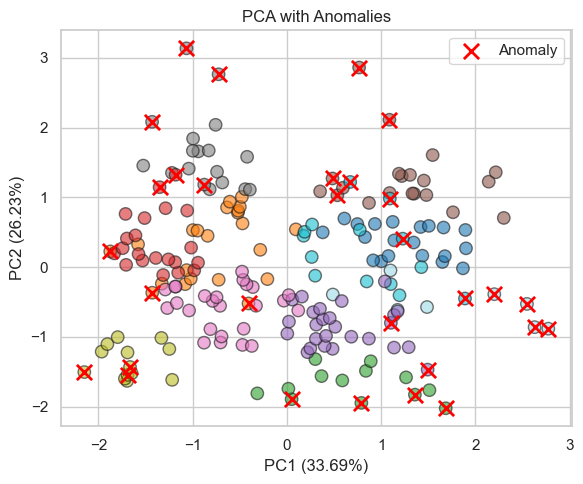

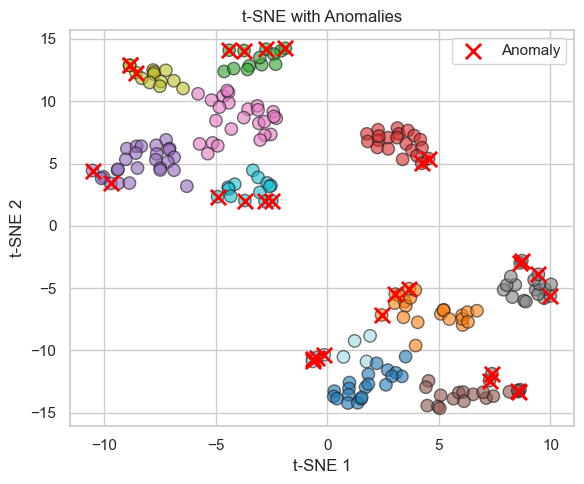

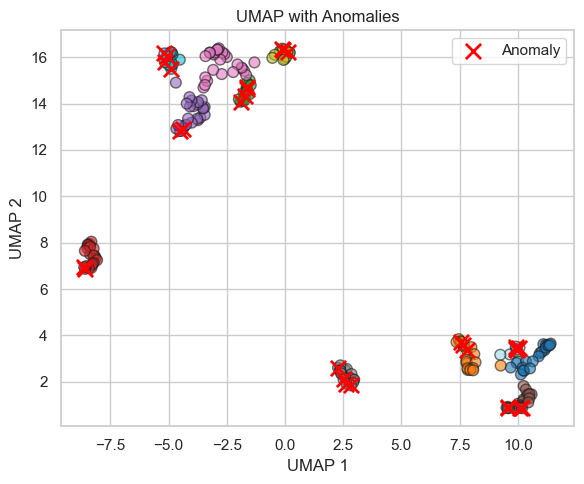

In [83]:
# Choose contamination level for anomalies
contamination = 0.15
anomaly_labels = anomaly_results[contamination]["labels"]
anomaly_mask = anomaly_labels == -1

# PCA with anomalies
plt.figure(figsize=(6, 5))
plt.scatter(features_pca[:, 0], features_pca[:, 1],
            c=df_copy['cluster'], cmap='tab20', s=80, alpha=0.6, edgecolors='k')
plt.scatter(features_pca[anomaly_mask, 0], features_pca[anomaly_mask, 1],
            c='red', s=120, marker='x', linewidths=2, label='Anomaly')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.title('PCA with Anomalies')
plt.legend()
plt.tight_layout()
plt.show()

# t-SNE with anomalies
plt.figure(figsize=(6, 5))
plt.scatter(features_tsne[:, 0], features_tsne[:, 1],
            c=df_copy['cluster'], cmap='tab20', s=80, alpha=0.6, edgecolors='k')
plt.scatter(features_tsne[anomaly_mask, 0], features_tsne[anomaly_mask, 1],
            c='red', s=120, marker='x', linewidths=2, label='Anomaly')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE with Anomalies')
plt.legend()
plt.tight_layout()
plt.show()

# UMAP with anomalies
plt.figure(figsize=(6, 5))
plt.scatter(features_umap[:, 0], features_umap[:, 1],
            c=df_copy['cluster'], cmap='tab20', s=60, alpha=0.6, edgecolors='k')
plt.scatter(features_umap[anomaly_mask, 0], features_umap[anomaly_mask, 1],
            c='red', s=120, marker='x', linewidths=2, label='Anomaly')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP with Anomalies')
plt.legend()
plt.tight_layout()
plt.show()

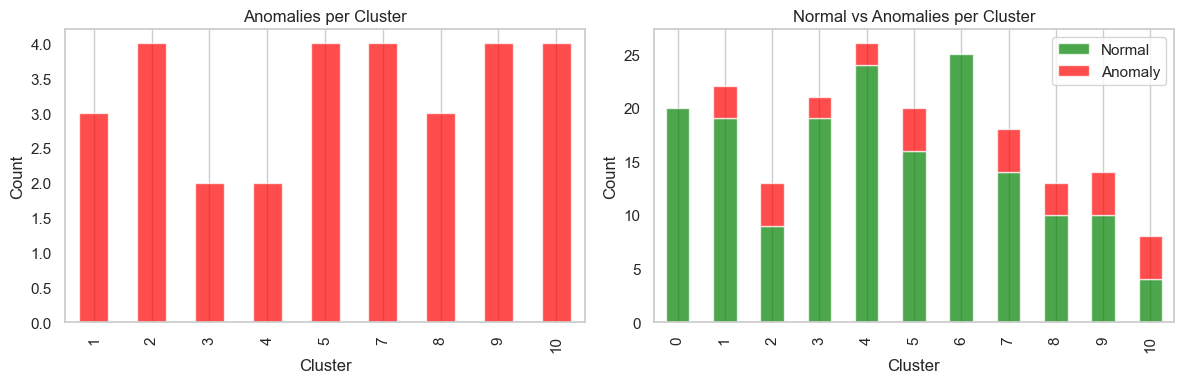

Anomalies per cluster:
cluster
1     3
2     4
3     2
4     2
5     4
7     4
8     3
9     4
10    4
dtype: int64

Normal points per cluster:
cluster
0     20
1     19
2      9
3     19
4     24
5     16
6     25
7     14
8     10
9     10
10     4
dtype: int64


In [84]:
# Plot anomaly counts per cluster
anomaly_counts = df_copy[anomaly_mask].groupby('cluster').size()
normal_counts = df_copy[~anomaly_mask].groupby('cluster').size()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart of anomaly counts per cluster
anomaly_counts.plot(kind='bar', ax=axes[0], color='red', alpha=0.7)
axes[0].set_title('Anomalies per Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y')

# Stacked bar chart of normal vs anomalies per cluster
cluster_distribution = pd.DataFrame({
    'Normal': normal_counts,
    'Anomaly': anomaly_counts
}).fillna(0)
cluster_distribution.plot(kind='bar', stacked=True, ax=axes[1], color=['green', 'red'], alpha=0.7)
axes[1].set_title('Normal vs Anomalies per Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Count')
axes[1].legend(['Normal', 'Anomaly'])
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

print("Anomalies per cluster:")
print(anomaly_counts)
print("\nNormal points per cluster:")
print(normal_counts)

In [85]:
# Display anomalous datapoints
anomalous_data = df_copy[anomaly_mask][['age', 'annual_income_k$', 'spending_score_1-100', 'gender', 'cluster']].head(10)
print("Sample of anomalous datapoints:")
print(anomalous_data)

# Show summary statistics of anomalies vs normal points
print("\nComparison of anomalies vs normal points:")
print("\nAnomalies:")
print(df_copy[anomaly_mask][['age', 'annual_income_k$', 'spending_score_1-100']].describe())
print("\nNormal points:")
print(df_copy[~anomaly_mask][['age', 'annual_income_k$', 'spending_score_1-100']].describe())

Sample of anomalous datapoints:
    age  annual_income_k$  spending_score_1-100  gender  cluster
0    19                15                    39       1        1
1    21                15                    81       1        1
2    20                16                     6       0        2
6    35                18                     6       0        2
7    23                18                    94       0        8
8    64                19                     3       1       10
10   67                19                    14       1       10
11   35                19                    99       0        8
12   58                20                    15       0        2
19   35                23                    98       0        8

Comparison of anomalies vs normal points:

Anomalies:
             age  annual_income_k$  spending_score_1-100
count  30.000000         30.000000             30.000000
mean   39.966667         63.066667             42.600000
std    16.080580         45

### Contamination Value Selection

Three contamination values were tested: 0.05, 0.10, and 0.15.

At a contamination value of 0.05, only the most extreme outliers were detected, resulting in a very small number of anomalies. While these cases were clearly unusual, this setting missed several customers with meaningful but less extreme behavior.

At 0.10, a broader set of anomalies was identified, but some borderline cases were still excluded.

At 0.15, the model captured both extreme and moderately unusual customers while still maintaining interpretability. This setting provided a good balance between sensitivity and noise.

Therefore, a contamination value of **0.15** was selected for the final analysis.

### Visualization of Anomalies

Detected anomalies were visualized on PCA, t-SNE, and UMAP plots by highlighting anomalous points in a different color.

Across all visualizations, anomalies tend to appear at the edges of clusters or in isolated regions of the embedding space. 
t-SNE and UMAP, in particular, show anomalies clearly separated from dense cluster regions, reinforcing that these observations differ significantly from typical customer behavior.


### Cluster Distribution of Anomalies

Most anomalies originate from the high-income clusters, particularly the Premium Customer segment. 
This suggests that unusual behavior is more common among customers with higher purchasing power, where spending patterns vary more widely.

Fewer anomalies were detected in low-income clusters, where spending behavior is more consistent and constrained.


### Characteristics of Anomalies

The detected anomalies differ from typical customers in one or more of the following ways:

- Extremely high spending scores compared to others in the same income range
- High income combined with unusually low spending behavior
- Spending patterns that do not align with the dominant trend of their cluster

These characteristics indicate that anomalies are not random noise, but represent meaningful deviations from normal customer behavior.


### Example Anomalous Customers

Several anomalous customers were identified based on extreme or unusual combinations of income and spending behavior:

- **Customer A:** Age = 21, Annual Income = 15k, Spending Score = 81, Cluster = 1  
  This customer shows very high spending despite extremely low income, which is uncommon compared to the majority of customers.

- **Customer B:** Age = 35, Annual Income = 18k, Spending Score = 6, Cluster = 2  
  This customer has low income and exceptionally low spending, placing them at the lower extreme of customer engagement.

- **Customer C:** Age = 23, Annual Income = 18k, Spending Score = 94, Cluster = 8  
  Despite low income, this customer exhibits extremely high spending behavior, making them a strong outlier.

- **Customer D:** Age = 64, Annual Income = 19k, Spending Score = 3, Cluster = 10  
  This customer combines low income with minimal spending and older age, which significantly differs from typical customer patterns.

- **Customer E:** Age = 35, Annual Income = 23k, Spending Score = 98, Cluster = 8  
  This represents another extreme high-spending case relative to income.



### Characteristics of Detected Anomalies

Compared to normal customers, anomalies display much wider variation in both income and spending behavior. 
While normal customers have an average annual income of approximately 60k and a mean spending score of about 52, anomalous customers show a broader range, with incomes ranging from 15k to 137k and spending scores ranging from 3 to 99.

Notably, the upper quartile of anomalous customers has an annual income above 110k and spending scores above 82, indicating extreme high-value behavior. 
At the same time, many anomalies also appear at the opposite end of the spectrum, with very low income and extremely low or extremely high spending.

This wide spread suggests that anomalies capture both exceptionally valuable customers and highly atypical low-engagement behavior.



### Anomaly Categories and Business Actions

We can then categorize these anomalies based on their characteristics, which can be grouped into the following:

- **High-Spending Low-Income Customers:**  
  Customers with annual income below 25k but spending scores above 80 (e.g., income = 15–23k, spending = 81–99).  
  *Business Action:* Monitor purchasing behavior and consider targeted promotions, as these customers may represent niche or impulsive buyers.

- **Low-Engagement Customers:**  
  Customers with low income and very low spending scores (e.g., spending ≤ 10).  
  *Business Action:* These customers may require re-engagement strategies or may not be cost-effective to target heavily.

- **High-Income Outliers (VIPs):**  
  Customers in the upper income range (up to 137k) with either extremely high or unexpectedly low spending.  
  *Business Action:* High spenders should receive premium offers and loyalty rewards, while low spenders may warrant investigation into dissatisfaction or missed opportunities.


### Cluster Distribution of Anomalies

Anomalies are concentrated primarily in higher-numbered clusters associated with extreme spending behavior, as well as clusters representing low-income customers with atypical engagement levels.

This indicates that anomalies tend to arise at the edges of customer segments, particularly where income and spending behaviors diverge from expected patterns. 
High-income clusters contribute VIP anomalies, while low-income clusters contribute unusual high or low spending cases.


### Interpretation of Anomalies

We can ask whether the detected anomalies include both “good” and “bad” cases? 
High-spending customers, particularly those with extreme spending scores, represent positive anomalies and valuable business opportunities.

On the other hand, customers with very low spending scores may indicate disengagement or low lifetime value. 
Overall, most anomalies represent meaningful behavioral extremes rather than data errors, making them valuable for targeted business strategies.




### Part 4: Integrated Analysis

### Integrated Analysis and Business Recommendations

The clustering analysis grouped customers into clear segments based on their annual income and spending score. Using K-means with K = 4 resulted in customer groups that are easy to understand and reflect real differences in purchasing behavior.

Dimensionality reduction was used to check and better interpret these clusters. The PCA plot showed some overlap between clusters, suggesting that customer behavior cannot be fully separated using simple linear relationships. However, both t-SNE and UMAP showed much clearer separation, confirming that the clusters found by K-means represent real patterns in the data. This indicates that customer behavior follows more complex, non-linear relationships.

Anomaly detection using Isolation Forest provided additional insight by identifying customers who behave very differently from the rest. These anomalies were not randomly scattered but were mostly found near the edges of clusters, especially in groups with extreme spending behavior. Many of the high-spending anomalies came from more engaged or higher-income clusters, suggesting the presence of VIP customers. Other anomalies appeared in lower-income clusters and represented unusually high or low spending compared to similar customers.

Overall, these three techniques work well together. Clustering helps segment customers, dimensionality reduction confirms and visualizes those segments, and anomaly detection highlights customers who stand out from typical behavior. From a business standpoint, this supports a layered strategy: general marketing can target entire clusters, while high-value anomalies can be handled individually with personalized offers or loyalty programs. Customers showing unusually low engagement may need reactivation efforts or could be deprioritized. By combining these methods, businesses can make more informed and targeted decisions.
